## 01/ Preprocessing

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Enable inline plotting in the notebook
%matplotlib inline

In [204]:
# Read the XLSX file
data_2010 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2009-2010")
data_2011 = pd.read_excel("../data/bronze.xlsx",sheet_name="Year 2010-2011")

In [205]:
datas = [data_2010, data_2011]
data = pd.concat(datas, keys = ['09-10', '10-11'])
data

Invoice StockCode                          Description  Quantity  \
09-10 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1       489434    79323P                   PINK CHERRY LIGHTS        12   
      2       489434    79323W                  WHITE CHERRY LIGHTS        12   
      3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
      4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...              ...       ...                                  ...       ...   
10-11 541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
      541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
      541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
      541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
      541909  581587      POST                              POSTAGE         1   

                     InvoiceDate  Price  Customer ID         Country  
09-10 0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
      1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
      3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
      4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                          ...    ...          ...             ...  
10-11 541905 2011-12-09 12:50:00   2.10      12680.0          France  
      541906 2011-12-09 12:50:00   4.15      12680.0          France  
      541907 2011-12-09 12:50:00   4.15      12680.0          France  
      541908 2011-12-09 12:50:00   4.95      12680.0          France  
      541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

### Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal. The name of the country where a customer resides.

In [206]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(data, title="Profiling Report")

# Save the report as an HTML file
profile.to_file("profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [207]:
data.rename(index = str, \
              columns = {'Invoice' : 'invoice', \
                         'StockCode' : 'stock_code', \
                         'Quantity' : 'quantity', \
                         'InvoiceDate' : 'invoice_date', \
                         'Price' : 'unit_price', \
                         'Country' : 'country', \
                         'Description' : 'description', \
                         'Customer ID' : 'customer_id'}, inplace = True)
data

invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price  customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95      13085.0   
      1             12 2009-12-01 07:45:00        6.75      13085.0   
      2             12 2009-12-01 07:45:00        6.75      13085.0   
      3             48 2009-12-01 07:45:00        2.10      13085.0   
      4             24 2009-12-01 07:45:00        1.25      13085.0   
...                ...                 ...         ...          ...   
10-11 541905         6 2011-12-09 12:50:00        2.10      12680.0   
      541906         4 2011-12-09 12:50:00        4.15      12680.0   
      541907         4 2011-12-09 12:50:00        4.15      12680.0   
      541908         3 2011-12-09 12:50:00        4.95      12680.0   
      541909         1 2011-12-09 12:50:00       18.00      12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[1067371 rows x 8 columns]

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067371 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 90.5+ MB


In [209]:
# number of unique customers
data["customer_id"].nunique()

5942

In [210]:
# Check the statistical information for data for null values:
data.isnull().sum().sort_values(ascending = False)

customer_id     243007
description       4382
invoice              0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [211]:
data.describe()

,quantity,unit_price,customer_id
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [212]:
# Calculate how many negative values of unit_price are present in retail. If they are only a small percentage of the total number of instances, then remove them from retail:
(data['unit_price'] <= 0).sum()

6207

In [213]:
# Similarly, find out the number of negative values of quantity:
(data['quantity'] <= 0).sum()

22950

In [214]:
# Display the total number of negative instances for the unit_price and quantity columns:
data[(data['unit_price'] <= 0) & (data['quantity'] <= 0) \
       & (data['customer_id'].isnull())]

invoice stock_code   description  quantity        invoice_date  \
09-10 263     489464      21733  85123a mixed       -96 2009-12-01 10:52:00   
      283     489463      71477         short      -240 2009-12-01 10:52:00   
      284     489467     85123A   21733 mixed      -192 2009-12-01 10:53:00   
      470     489521      21646           NaN       -50 2009-12-01 11:44:00   
      3114    489655      20683           NaN       -44 2009-12-01 17:26:00   
...              ...        ...           ...       ...                 ...   
10-11 535333  581210      23395         check       -26 2011-12-07 18:36:00   
      535335  581212      22578          lost     -1050 2011-12-07 18:38:00   
      535336  581213      22576         check       -30 2011-12-07 18:38:00   
      536910  581226      23090       missing      -338 2011-12-08 09:56:00   
      538925  581422      23169       smashed      -235 2011-12-08 15:24:00   

              unit_price  customer_id         country  
09-10 263            0.0          NaN  United Kingdom  
      283            0.0          NaN  United Kingdom  
      284            0.0          NaN  United Kingdom  
      470            0.0          NaN  United Kingdom  
      3114           0.0          NaN  United Kingdom  
...                  ...          ...             ...  
10-11 535333         0.0          NaN  United Kingdom  
      535335         0.0          NaN  United Kingdom  
      535336         0.0          NaN  United Kingdom  
      536910         0.0          NaN  United Kingdom  
      538925         0.0          NaN  United Kingdom  

[3457 rows x 8 columns]

In [215]:
data[(data['quantity'] <= 0) ]

invoice stock_code                       description  quantity  \
09-10 178     C489449      22087          PAPER BUNTING WHITE LACE       -12   
      179     C489449     85206A      CREAM FELT EASTER EGG BASKET        -6   
      180     C489449      21895     POTTING SHED SOW 'N' GROW SET        -4   
      181     C489449      21896                POTTING SHED TWINE        -6   
      182     C489449      22083        PAPER CHAIN KIT RETRO SPOT       -12   
...               ...        ...                               ...       ...   
10-11 540449  C581490      23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
      541541  C581499          M                            Manual        -1   
      541715  C581568      21258        VICTORIAN SEWING BOX LARGE        -5   
      541716  C581569      84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
      541717  C581569      20979     36 PENCILS TUBE RED RETROSPOT        -5   

                    invoice_date  unit_price  customer_id         country  
09-10 178    2009-12-01 10:33:00        2.95      16321.0       Australia  
      179    2009-12-01 10:33:00        1.65      16321.0       Australia  
      180    2009-12-01 10:33:00        4.25      16321.0       Australia  
      181    2009-12-01 10:33:00        2.10      16321.0       Australia  
      182    2009-12-01 10:33:00        2.95      16321.0       Australia  
...                          ...         ...          ...             ...  
10-11 540449 2011-12-09 09:57:00        0.83      14397.0  United Kingdom  
      541541 2011-12-09 10:28:00      224.69      15498.0  United Kingdom  
      541715 2011-12-09 11:57:00       10.95      15311.0  United Kingdom  
      541716 2011-12-09 11:58:00        1.25      17315.0  United Kingdom  
      541717 2011-12-09 11:58:00        1.25      17315.0  United Kingdom  

[22950 rows x 8 columns]

In [216]:
data[(data['unit_price'] < 0) ]

invoice stock_code      description  quantity  \
09-10 179403  A506401          B  Adjust bad debt         1   
      276274  A516228          B  Adjust bad debt         1   
      403472  A528059          B  Adjust bad debt         1   
10-11 299983  A563186          B  Adjust bad debt         1   
      299984  A563187          B  Adjust bad debt         1   

                    invoice_date  unit_price  customer_id         country  
09-10 179403 2010-04-29 13:36:00   -53594.36          NaN  United Kingdom  
      276274 2010-07-19 11:24:00   -44031.79          NaN  United Kingdom  
      403472 2010-10-20 12:04:00   -38925.87          NaN  United Kingdom  
10-11 299983 2011-08-12 14:51:00   -11062.06          NaN  United Kingdom  
      299984 2011-08-12 14:52:00   -11062.06          NaN  United Kingdom

In [217]:
# Store the instances with missing values in another DataFrame:
null_data = data[data.isnull().any(axis=1)]
null_data

invoice stock_code                     description  quantity  \
09-10 263     489464      21733                    85123a mixed       -96   
      283     489463      71477                           short      -240   
      284     489467     85123A                     21733 mixed      -192   
      470     489521      21646                             NaN       -50   
      577     489525     85226C       BLUE PULL BACK RACING CAR         1   
...              ...        ...                             ...       ...   
10-11 541536  581498     85099B         JUMBO BAG RED RETROSPOT         5   
      541537  581498     85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
      541538  581498      85150   LADIES & GENTLEMEN METAL SIGN         1   
      541539  581498      85174               S/4 CACTI CANDLES         1   
      541540  581498        DOT                  DOTCOM POSTAGE         1   

                    invoice_date  unit_price  customer_id         country  
09-10 263    2009-12-01 10:52:00        0.00          NaN  United Kingdom  
      283    2009-12-01 10:52:00        0.00          NaN  United Kingdom  
      284    2009-12-01 10:53:00        0.00          NaN  United Kingdom  
      470    2009-12-01 11:44:00        0.00          NaN  United Kingdom  
      577    2009-12-01 11:49:00        0.55          NaN  United Kingdom  
...                          ...         ...          ...             ...  
10-11 541536 2011-12-09 10:26:00        4.13          NaN  United Kingdom  
      541537 2011-12-09 10:26:00        4.13          NaN  United Kingdom  
      541538 2011-12-09 10:26:00        4.96          NaN  United Kingdom  
      541539 2011-12-09 10:26:00       10.79          NaN  United Kingdom  
      541540 2011-12-09 10:26:00     1714.17          NaN  United Kingdom  

[243007 rows x 8 columns]

In [218]:
# # Delete the instances with missing values from retail:
# new_data = data[(data['unit_price'] > 0) \
#                     & (data['quantity'] > 0)]
# new_data.describe()

In [219]:
# Drop rows with NaN values in the customer_id column
del_data = data.dropna(subset=['customer_id', 'description'])

del_data

invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price  customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95      13085.0   
      1             12 2009-12-01 07:45:00        6.75      13085.0   
      2             12 2009-12-01 07:45:00        6.75      13085.0   
      3             48 2009-12-01 07:45:00        2.10      13085.0   
      4             24 2009-12-01 07:45:00        1.25      13085.0   
...                ...                 ...         ...          ...   
10-11 541905         6 2011-12-09 12:50:00        2.10      12680.0   
      541906         4 2011-12-09 12:50:00        4.15      12680.0   
      541907         4 2011-12-09 12:50:00        4.15      12680.0   
      541908         3 2011-12-09 12:50:00        4.95      12680.0   
      541909         1 2011-12-09 12:50:00       18.00      12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[824364 rows x 8 columns]

In [220]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 824364 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       824364 non-null  object        
 1   stock_code    824364 non-null  object        
 2   description   824364 non-null  object        
 3   quantity      824364 non-null  int64         
 4   invoice_date  824364 non-null  datetime64[ns]
 5   unit_price    824364 non-null  float64       
 6   customer_id   824364 non-null  float64       
 7   country       824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 74.5+ MB


In [221]:
# del_data.plot()

<AxesSubplot: >

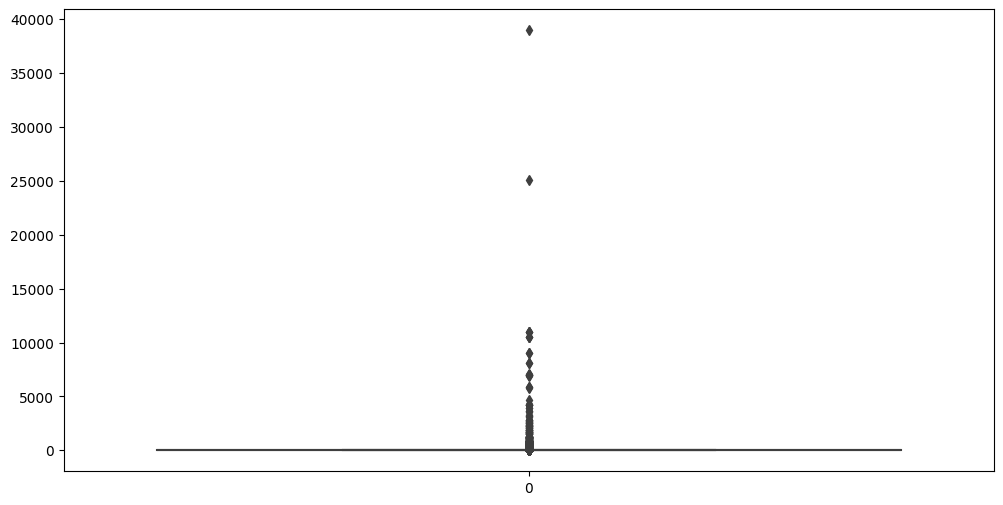

In [222]:
# Plot a boxplot for unit_price to see if there are any outliers. If there are, remove those instances:
plt.subplots(figsize = (12, 6))
sns.boxplot(del_data.unit_price)

In [223]:
del_data.drop_duplicates(inplace=True)
df = del_data
df

/tmp/ipykernel_28310/3612787721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del_data.drop_duplicates(inplace=True)


invoice stock_code                          description  \
09-10 0       489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
      1       489434     79323P                   PINK CHERRY LIGHTS   
      2       489434     79323W                  WHITE CHERRY LIGHTS   
      3       489434      22041         RECORD FRAME 7" SINGLE SIZE    
      4       489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...              ...        ...                                  ...   
10-11 541905  581587      22899         CHILDREN'S APRON DOLLY GIRL    
      541906  581587      23254        CHILDRENS CUTLERY DOLLY GIRL    
      541907  581587      23255      CHILDRENS CUTLERY CIRCUS PARADE   
      541908  581587      22138        BAKING SET 9 PIECE RETROSPOT    
      541909  581587       POST                              POSTAGE   

              quantity        invoice_date  unit_price  customer_id  \
09-10 0             12 2009-12-01 07:45:00        6.95      13085.0   
      1             12 2009-12-01 07:45:00        6.75      13085.0   
      2             12 2009-12-01 07:45:00        6.75      13085.0   
      3             48 2009-12-01 07:45:00        2.10      13085.0   
      4             24 2009-12-01 07:45:00        1.25      13085.0   
...                ...                 ...         ...          ...   
10-11 541905         6 2011-12-09 12:50:00        2.10      12680.0   
      541906         4 2011-12-09 12:50:00        4.15      12680.0   
      541907         4 2011-12-09 12:50:00        4.15      12680.0   
      541908         3 2011-12-09 12:50:00        4.95      12680.0   
      541909         1 2011-12-09 12:50:00       18.00      12680.0   

                     country  
09-10 0       United Kingdom  
      1       United Kingdom  
      2       United Kingdom  
      3       United Kingdom  
      4       United Kingdom  
...                      ...  
10-11 541905          France  
      541906          France  
      541907          France  
      541908          France  
      541909          France  

[797885 rows x 8 columns]

<AxesSubplot: >

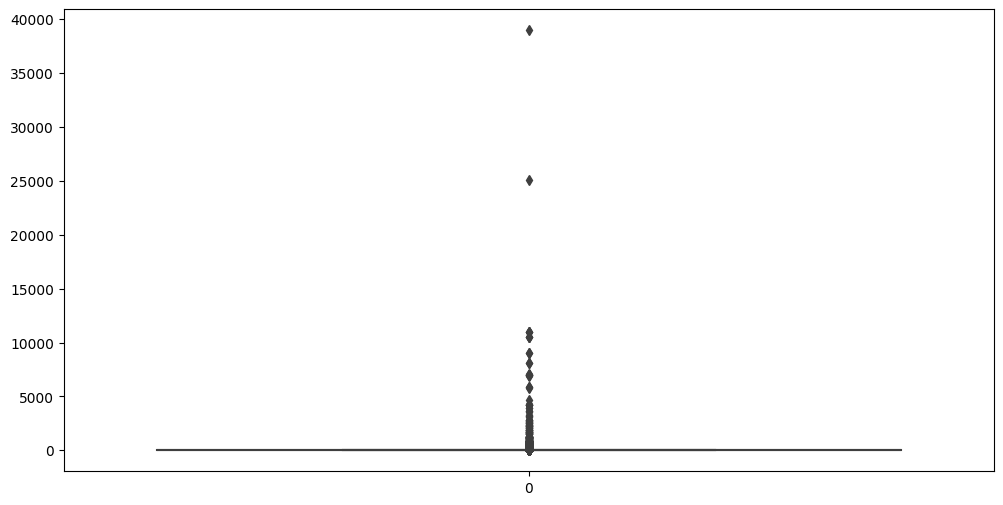

In [224]:
# Plot a boxplot for unit_price to see if there are any outliers. If there are, remove those instances:
plt.subplots(figsize = (12, 6))
sns.boxplot(df.unit_price)

In [225]:
# Filter the negative values
negative_values = del_data.unit_price[del_data.unit_price < 0]
negative_values

Series([], Name: unit_price, dtype: float64)

In [226]:
df = df[(df['unit_price'] > 0) & (df['unit_price'] < 15000)]
df.describe()

,quantity,unit_price,customer_id
count,797813.000000,797813.000000,797813.000000
mean,12.585628,3.622745,15313.155095
std,191.163300,49.031018,1696.438130
min,-80995.000000,0.001000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16789.000000
max,80995.000000,10953.500000,18287.000000


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 797813 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice       797813 non-null  object        
 1   stock_code    797813 non-null  object        
 2   description   797813 non-null  object        
 3   quantity      797813 non-null  int64         
 4   invoice_date  797813 non-null  datetime64[ns]
 5   unit_price    797813 non-null  float64       
 6   customer_id   797813 non-null  float64       
 7   country       797813 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 72.8+ MB


In [228]:
df.isnull().sum().sort_values(ascending = False)

invoice         0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

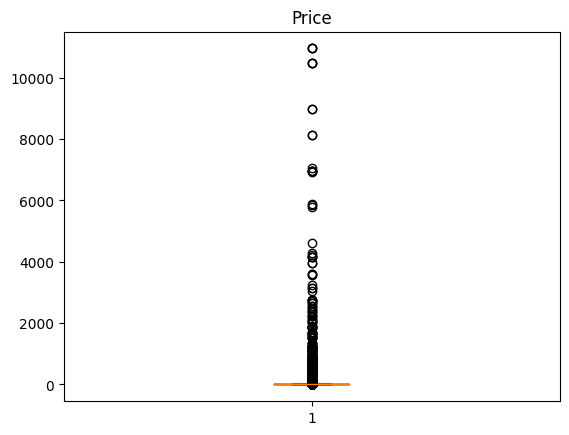

In [229]:

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(df.unit_price)

# Set title

ax.set_title('Price')

# Display the plot
plt.show()

In [230]:
# number of unique customers
df["customer_id"].nunique()

5938

In [231]:
# change type of customer_id from float to string
data['customer_id']=data['customer_id'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1067371 entries, ('09-10', '0') to ('10-11', '541909')
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice       1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   1067371 non-null  object        
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 90.5+ MB


### Remarks:
- 

## 02/ Data Analysis

### Customer Segmentation with RFM

In [232]:
import datetime as dt

In [233]:
# Add a new column which calculates the total despense
df['TotalPrice'] = df['quantity'] * df['unit_price']
df.head(2)

/tmp/ipykernel_28310/1020849908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['quantity'] * df['unit_price']


invoice stock_code                          description  quantity  \
09-10 0  489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
      1  489434     79323P                   PINK CHERRY LIGHTS        12   

               invoice_date  unit_price  customer_id         country  \
09-10 0 2009-12-01 07:45:00        6.95      13085.0  United Kingdom   
      1 2009-12-01 07:45:00        6.75      13085.0  United Kingdom   

         TotalPrice  
09-10 0        83.4  
      1        81.0

### Calculating RFM Metrics (Recency, frequency and monetary)
- R for how recently did the customer purchase? This information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs.

- F for how often do the customer purchase? Predicting this can assist marketing efforts directed at reminding the customer to visit the business again.

- M for how much do the customer spend? While this can produce a better return on investment in marketing and customer service, it also runs the risk of alienating customers who have been consistent but have not spent as much with each transaction.

### RFM Segments
- Champions: Your best customers, they buy and spend a lot and made their last purchase recently.

- Loyal Customer: Very good customers. They spend a lot.

- Potential Loyalist: Recent customers, but who have already spent a lot.

- New Customer: Recent customers, who made only a few purchases.

- Promising: Customers who buy frequently and spend a lot, but made their last purchase some time ago.

- Need Attention: Customers with recency and above-average spending.

- At Risk: Customers who bought frequently, but haven't made any purchases in a long time.

- Can't lose them: Customers who have spent a lot, but have been inactive for a long time.

- Hibernate: Low-frequency, low-spender customers who haven't bought in a long time.

- Lost: Your worst customers. They haven't bought in a long time, they only bought once and they spent very little.